In [34]:
from typing import TypedDict, Annotated, Literal
from langgraph.graph import START,END,StateGraph
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
from langgraph.checkpoint.memory import InMemorySaver
from pydantic import BaseModel, Field
from langchain_core.output_parsers import StrOutputParser
import os

load_dotenv()

True

In [35]:
os.environ['LANGGRAPH_PROJECT']="Langgraph-HITL"

In [36]:
gpt_llm=ChatOpenAI(model="gpt-4o-mini")

In [37]:
class Classifier(BaseModel):
    urgency: Literal["High","Medium","Low"] =  Field(description="This is used to define the urgency of a ticket")

In [38]:
class State(TypedDict):
    title: str
    urgency: str

In [39]:
structured_llm = gpt_llm.with_structured_output(Classifier)

In [40]:
def classifier(state: State) -> State:
    prompt = f"You role is to classify the ticket based on the user input: \n {state['title']}"

    response=structured_llm.invoke(prompt)

    return {"urgency":response.urgency}







In [41]:
graph=StateGraph(State)
graph.add_node("classifier",classifier)
graph.add_edge(START,"classifier")
graph.add_edge("classifier",END)

workflow=graph.compile()

In [42]:
workflow.invoke({"title":"I want the issue to be fixed asap"})

{'title': 'I want the issue to be fixed asap', 'urgency': 'High'}

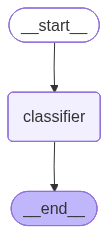

In [43]:
display(Image(workflow.get_graph().draw_mermaid_png()))